In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>


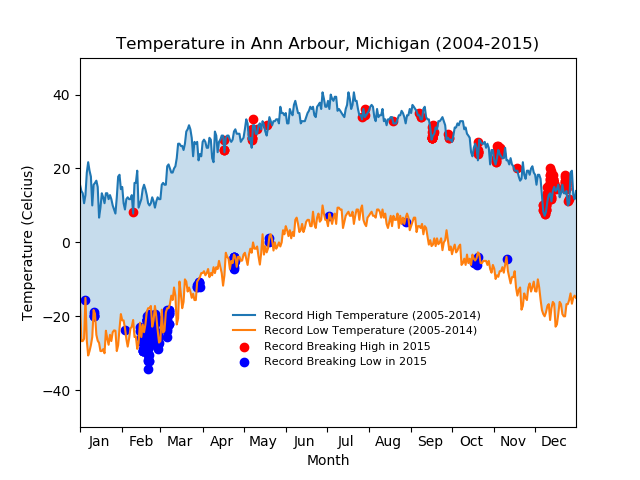

In [209]:
df = pd.read_csv('a2.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace = True)

df['Year'] = df['Date'].dt.year
df['Month_Day'] = df['Date'].dt.strftime('%m-%d')
df['Data_Value'] = df['Data_Value']*0.1


df = df[(df['Month_Day'] != '02-29')]


max_temp = df[(df['Element']=='TMAX') & (df['Year']>=2005) & (df['Year']<=2014)].groupby(['Month_Day'])['Data_Value'].max()
min_temp = df[(df['Element']=='TMIN') & (df['Year']>=2005) & (df['Year']<=2014)].groupby(['Month_Day'])['Data_Value'].min()

x = np.arange(np.datetime64('2015-01-01'), len(max_temp))

plt.plot(x, max_temp, label = 'Record High Temperature (2005-2014)')
plt.plot(x, min_temp, label = 'Record Low Temperature (2005-2014)')
plt.fill_between(x, max_temp, y2 = min_temp, alpha = 0.25)

max_temp = max_temp.reset_index()
max_temp = max_temp.rename(columns = {'Data_Value' : 'Max_temp'})

min_temp = min_temp.reset_index()
min_temp = min_temp.rename(columns = {'Data_Value' : 'Min_temp'})

df = pd.merge(df, max_temp, on = 'Month_Day', how = 'left')
df = pd.merge(df, min_temp, on = 'Month_Day', how = 'left')

broken_max = df[(df.Year==2015) & (df.Data_Value > df.Max_temp)]
broken_min = df[(df.Year==2015) & (df.Data_Value < df.Min_temp)]

plt.scatter(broken_max.Date, broken_max.Data_Value, color = 'red', label = 'Record Breaking High in 2015')
plt.scatter(broken_min.Date, broken_min.Data_Value, color = 'blue', label = 'Record Breaking Low in 2015')

plt.title('Temperature in Ann Arbour, Michigan (2004-2015)')
plt.xlabel('Month')
plt.ylabel('Temperature (Celcius)')
plt.legend(loc = (0.3, 0.15), frameon = False, prop={"size":8})

ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31',-50,50])

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

plt.savefig('assignment2.png')
plt.show()